In [ ]:
!pip install -q diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 12.9 MB/s eta 0:00:00


In [ ]:
import torch
import requests
from PIL import Image
from diffusers import DiffusionPipeline, EulerAncestralDiscreteScheduler

# Load the pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "sudo-ai/zero123plus-v1.1", custom_pipeline="sudo-ai/zero123plus-pipeline",
    torch_dtype=torch.float16
)
# Feel free to tune the scheduler
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(
    pipeline.scheduler.config, timestep_spacing='trailing'
)
pipeline.to('cuda:0')


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

pipeline.py:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

vision_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)_extractor_clip/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

(…)e_extractor_vae/preprocessor_config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

vision_encoder/config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/8 [00:00<?, ?it/s]

Zero123PlusPipeline {
  "_class_name": "Zero123PlusPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "sudo-ai/zero123plus-v1.1",
  "feature_extractor_clip": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "feature_extractor_vae": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "ramping_coefficients": [
    0.0,
    0.2060057818889618,
    0.18684479594230652,
    0.24342191219329834,
    0.18507817387580872,
    0.1703828126192093,
    0.15628913044929504,
    0.14174538850784302,
    0.13617539405822754,
    0.13569170236587524,
    0.1269884556531906,
    0.1200924888253212,
    0.12816639244556427,
    0.13058121502399445,
    0.14201879501342773,
    0.15004529058933258,
    0.1620427817106247,
    0.17207716405391693,
    0.18534132838249207,
    0.20002241432666779,
    0.21657466888427734,
    0.22996725142002106,
    0.24613411724567413,
    0.25141021609306335,
    0.26613450050354004,
    0.271847128868103,
    0.2850190997123718,
    0.2857492268085

In [ ]:
cond = Image.open('/content/WhatsApp Image 2023-12-24 at 19.12.18_ab120331.jpg')
result = pipeline(cond , num_inference_steps=100).images[0]
result.show()
result.save("output.png")

  0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
import numpy as np

In [ ]:
image = np.array(result)

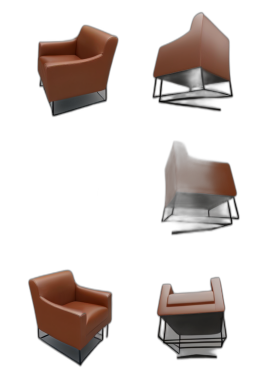

In [ ]:
import matplotlib.pyplot as plt


rows = 3
cols = 2

# Calculate the height and width of each sub-image
subimage_height = image.shape[0] // rows
subimage_width = image.shape[1] // cols

# Draw grid lines
for i in range(1, rows):
    image[i * subimage_height, :, :] = 0  # Horizontal line

for j in range(1, cols):
    image[:, j * subimage_width, :] = 0  # Vertical line


# Save each sub-image as a PNG file
for row in range(rows):
    for col in range(cols):
        sub_image = image[row * subimage_height: (row + 1) * subimage_height,
                          col * subimage_width: (col + 1) * subimage_width, :]

        # Create a PIL Image from the NumPy array
        pil_image = Image.fromarray(sub_image)

        # Save the image as PNG
        pil_image.save(f'subimage_{row}_{col}.png')

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!pip install opengv

ERROR: Could not find a version that satisfies the requirement opengv (from versions: none)
ERROR: No matching distribution found for opengv


In [ ]:
import cv2
import numpy as np
from openmvg import pymvg

# Step 1: Camera Calibration
def calibrate_camera(images):
    obj_points = []  # 3D points in real world space
    img_points = []  # 2D points in image plane
    chessboard_size = (7, 6)  # Change this according to your calibration pattern

    objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

    for image_path in images:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

        if ret:
            obj_points.append(objp)
            img_points.append(corners)

    img_size = gray.shape[::-1]
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size, None, None)

    return mtx, dist

# Step 2: Feature Matching and Structure from Motion
def reconstruct_3d_object(images, camera_matrix, distortion_coefficients):
    # Load images
    images_data = [(cv2.imread(image), image) for image in images]

    # Perform feature matching using SIFT
    sift = cv2.SIFT_create()
    kp_list = []
    desc_list = []

    for img, _ in images_data:
        kp, desc = sift.detectAndCompute(img, None)
        kp_list.append(kp)
        desc_list.append(desc)

    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(desc_list[0], desc_list[1], k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Extract matched key points
    points1 = np.float32([kp_list[0][m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    points2 = np.float32([kp_list[1][m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find fundamental matrix
    F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_LMEDS)

    # Essential matrix
    E = camera_matrix.T @ F @ camera_matrix

    # Decompose essential matrix to get relative pose
    _, R, t, mask = cv2.recoverPose(E, points1, points2, cameraMatrix=camera_matrix)

    # Create a View for the first image
    view1 = pymvg.sfm_view.ImageCameraView(
        camera_matrix, distortion_coefficients, R=np.eye(3), t=np.zeros((3,))
    )

    # Create a View for the second image
    view2 = pymvg.sfm_view.ImageCameraView(
        camera_matrix, distortion_coefficients, R=R, t=t.flatten()
    )

    # Create a reconstruction
    reconstruction = pymvg.sfm_reconstruction.Reconstruction()

    # Add the views to the reconstruction
    reconstruction.views.append(view1)
    reconstruction.views.append(view2)

    # Bundle adjustment
    pymvg.sfm_optimizer.bundle_adjust(reconstruction)

    return reconstruction

# Example usage
image_paths = ["/content/subimage_0_0.png", "/content/subimage_0_1.png","/content/subimage_1_0.png","/content/subimage_1_1.png","/content/subimage_2_0.png","/content/subimage_2_1.png"]
camera_matrix, distortion_coefficients = calibrate_camera(image_paths)
reconstruction_result = reconstruct_3d_object(image_paths, camera_matrix, distortion_coefficients)

# Access reconstructed 3D points
points3D = reconstruction_result.points3D
for point_id, point in enumerate(points3D):
    print(f"3D Point {point_id + 1}: {point.coordinates}")


ModuleNotFoundError: ignored